In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as mplt
import numpy as np


In [14]:
#https://keras.io/api/datasets/
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [15]:
#train_x are images as 2D arrays of pixel values
train_x[0].shape

(28, 28)

In [16]:
#Sizes of datasets
len(train_x)

60000

In [17]:
len(test_x)

10000

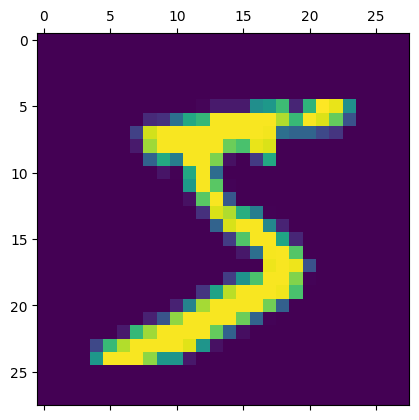

In [18]:
mplt.matshow(train_x[0])

In [19]:
train_y[0]

5

In [21]:
#scaling the dataset all pixels are between 0-255
train_x = train_x/255
test_x = test_x/255

In [22]:
#When create training or input data it almost always needs to be 1D
train_x_1D = train_x.reshape(len(train_x), 28*28)
test_x_1D = test_x.reshape(len(test_x), 28*28)

In [36]:
#Creating are model
NeuralNetwork = keras.Sequential([
    #dense every intail node is connect to all outputs nodes
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid'),
])



NeuralNetwork.compile(
    #https://www.geeksforgeeks.org/optimizers-in-tensorflow/
                    optimizer='adaMax', 
    #https://keras.io/api/losses/
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']
)
#training the model
NeuralNetwork.fit(train_x_1D, train_y, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 9s 4ms/step - loss: 2.2481 - accuracy: 0.6074
Epoch 2/4
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1457 - accuracy: 0.6785
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0482 - accuracy: 0.6933
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9562 - accuracy: 0.7104


In [8]:
#Testing on are test dataset
NeuralNetwork.evaluate(test_x_1D, test_y)

313/313 [==============================] - 2s 5ms/step - loss: 0.3001 - accuracy: 0.9165


[0.3001333773136139, 0.9164999723434448]

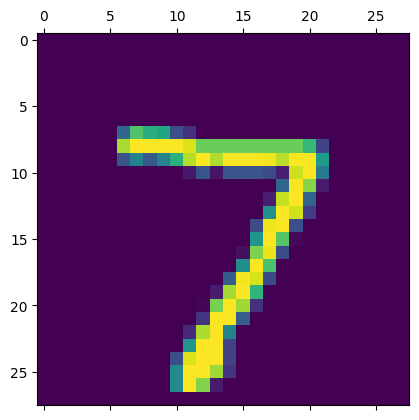

In [9]:
mplt.matshow(test_x[0])

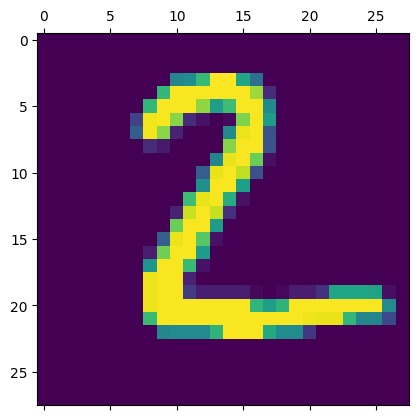

In [10]:
mplt.matshow(test_x[1])

In [11]:
predicted = NeuralNetwork.predict(test_x_1D)

313/313 [==============================] - 1s 3ms/step


In [ ]:
#Prediction array for test[0]
predicted[0]

In [12]:
np.argmax(predicted[0])

7

In [ ]:
#Prediction array for test[1]
predicted[1]

In [ ]:
np.argmax(predicted[1])

In [13]:
num_predictions = []
for i in predicted:
    num_predictions.append(np.argmax(i))
num_predictions[:10]
    

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [14]:
num_predictions = [np.argmax(i) for i in predicted]
Graphic = tf.math.confusion_matrix(labels=test_y,predictions=num_predictions)
Graphic

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    8,    1,    3,    0],
       [   0, 1108,    2,    2,    0,    3,    4,    1,   15,    0],
       [   7,    8,  906,   17,   12,    2,   13,   16,   46,    5],
       [   3,    1,   21,  912,    0,   28,    2,   11,   22,   10],
       [   2,    1,    5,    1,  911,    1,   11,    2,    9,   39],
       [   9,    3,    4,   38,    9,  761,   12,    6,   41,    9],
       [  12,    3,    6,    2,   10,   14,  906,    1,    4,    0],
       [   2,   11,   23,    6,    7,    0,    0,  938,    5,   36],
       [   6,    6,    7,   23,    9,   26,    8,   14,  865,   10],
       [   8,    7,    4,   12,   36,   12,    0,   23,    8,  899]])>

Text(95.72222222222221, 0.5, 'Actual Result')

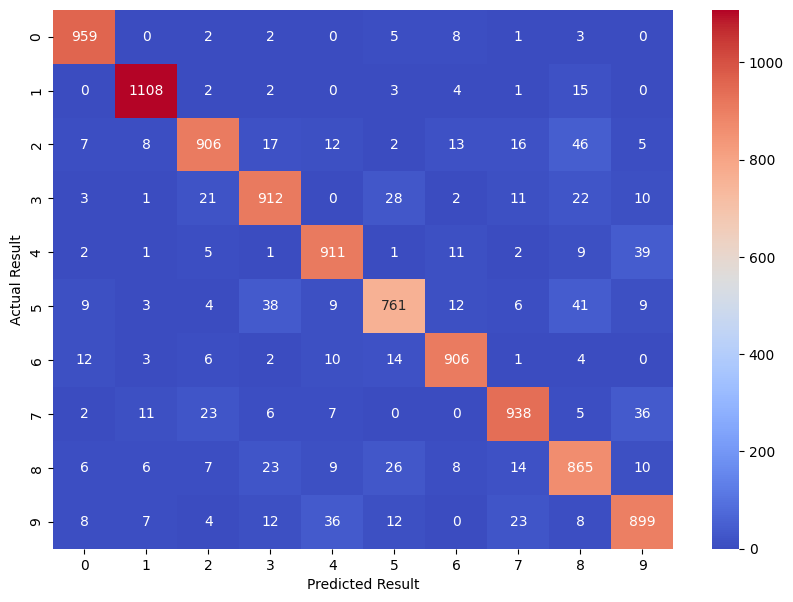

In [15]:
#Copied off this website https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
mplt.figure(figsize=(10,7))
sns.color_palette("bright", 10)
sns.heatmap(Graphic,annot=True, fmt="d", cmap="coolwarm")
mplt.xlabel('Predicted Result')
mplt.ylabel('Actual Result')